## Importing Libraries

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("../py")
#from utils import *

from sklearn import linear_model, utils, svm
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
!cp /content/drive/MyDrive/NLP/TextExtractionCleanUP.py /content

In [4]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 7.2 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=979291227a58d1a4a785d2825371a4ad54908702d1eecb1e2419057ab1269ed0
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [5]:
import TextExtractionCleanUP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from sklearn.utils import shuffle
df1 = pd.read_csv("/content/Final_hate.csv")
df = df1
df

,Unnamed: 0,Text,label
0,0,RT @MailOnline: The Nazi death gas so horrific...,0
1,1,Carlos Correa had gyalchester as his walkup mu...,0
2,2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0
3,3,RT @HeeeyMonica: Papaya has to be the worst fr...,0
4,4,@Pineaqples @DenialEsports btw I watched where...,0
...,...,...,...
103216,103216,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0
103217,103217,"you've gone and broke the wrong heart baby, an...",0
103218,103218,young buck wanna eat!!.. dat nigguh like I ain...,0
103219,103219,youu got wild bitches tellin you lies,0


In [8]:
train = df['Text']
test = df['label']

In [9]:
# set aside 20% of train and test data for evaluation
X_train, X_val, y_train, y_val = train_test_split(train, test, test_size=0.2, shuffle = False, random_state = 8)


print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))


print("========================")

#Use the same function above for the validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25,random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (82576,)
X_val shape: (20645,)
y_train shape: (82576,)
y_val shape: (20645,)
X_train shape: (61932,)
y_train shape: (61932,)
X_test shape: (20644,)
y_test shape: (20644,)


In [10]:
X_train.to_frame()
y_train.to_frame()

,label
69365,0
22438,0
42853,0
8270,0
20197,0
...,...
10376,0
62426,0
18417,0
25940,0


In [11]:
# Just for refrence
trainingData = pd.concat([X_train, y_train], axis=1, join='inner')
trainingData = trainingData.reset_index()
trainingData.drop(['index'],axis=1,inplace=True)
trainingData

,Text,label
0,@em_zyme @nvidiadeveloper @YahooGames @TwitchS...,0
1,Rainy Sunday afternoon working on laptop while...,0
2,You're the happiest when you are free to flit ...,0
3,i feel so out of it right now. i feel like how...,0
4,2 people followed me and one person unfollowed...,0
...,...,...
61927,Charlie Lee: Wow! Twitter just did a softfork ...,0
61928,RT @uberfeminist: #TwitterFeminism tries to ge...,0
61929,ROLL UP! Just follow me + Retweet &amp; you ca...,0
61930,Who needs California. Guy with surfboard in Hi...,0


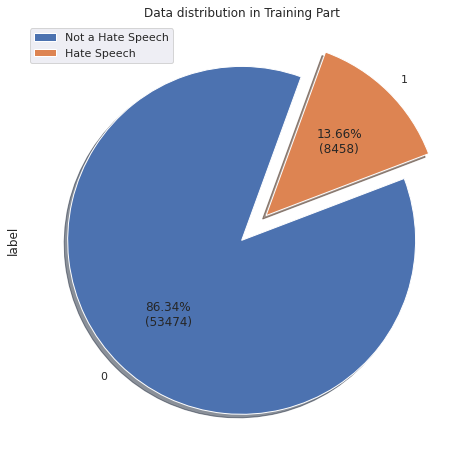

In [12]:
x = trainingData.label.value_counts()
x
import seaborn as sns
x = trainingData.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution in Training Part', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

## USING BackTranslation METHOD

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# Helper function to download data for a language
def download(model_name):
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    return tokenizer, model

# download model for English -> French
tmp_lang_tokenizer, tmp_lang_model = download('Helsinki-NLP/opus-mt-en-fr')
# download model for French -> English
src_lang_tokenizer, src_lang_model = download('Helsinki-NLP/opus-mt-fr-en')

In [ ]:
def translate(texts, model, tokenizer, language):
    """Translate texts into a target language"""
    # Format the text as expected by the model
    formatter_fn = lambda txt: f"{txt}" if language == "en" else f">>{language}<< {txt}"
    original_texts = [formatter_fn(txt) for txt in texts]

    # Translate
    translated = model.generate(**tokenizer(original_texts, return_tensors="pt", padding=True))

    # Decode (tokens to text)
    translated_texts = tokenizer.batch_decode(translated, skip_special_tokens=True)

    return translated_texts

def back_translate(texts, language_src, language_dst):
    """Implements back translation"""
    # Translate from source to target language
    translated = translate(texts, tmp_lang_model, tmp_lang_tokenizer, language_dst)

    # Translate from target language back to source language
    back_translated = translate(translated, src_lang_model, src_lang_tokenizer, language_src)

    return back_translated

In [ ]:
trainingData['label'][11]

0

In [ ]:
from tqdm import tqdm

da_data = []
for i in tqdm(range(len(trainingData['Text']))):
    label = trainingData['label'][i]
    text = trainingData['Text'][i]
    
    da_data.append({'Text':text,'label':label})
        
    if (label == 1):
        aug_ques = back_translate([text], "en", "fr")
        aug_ques = aug_ques[0].lower()
        if text != aug_ques:
            da_data.append({'Text':aug_ques,'label':label})

final_da_data=pd.DataFrame(da_data)

final_da_data

100%|██████████| 34845/34845 [2:48:23<00:00,  3.45it/s]


,Text,label
0,"@user you're right, we do need education refor...",0
1,aww yeah it's all good bing bong bing bong,0
2,This had me falling down laughing .,0
3,@user .@user gives white nationalist troll a ...,1
4,@user.@user gives a white nationalist troll a ...,1
...,...,...
37725,"According to Mathieson 2015 , they had around ...",0
37726,hey guys just letting you know im am not gay s...,0
37727,#igers #instadaily purchase proscar | b...,0
37728,just two days away for my vintage flea market....,0


In [ ]:
final_da_data.to_csv("BT.csv")

In [ ]:
aug_df = pd.read_csv("/content/BT.csv")
aug_df

,Unnamed: 0,Text,label
0,0,"@user you're right, we do need education refor...",0
1,1,aww yeah it's all good bing bong bing bong,0
2,2,This had me falling down laughing .,0
3,3,@user .@user gives white nationalist troll a ...,1
4,4,@user.@user gives a white nationalist troll a ...,1
...,...,...,...
37725,37725,"According to Mathieson 2015 , they had around ...",0
37726,37726,hey guys just letting you know im am not gay s...,0
37727,37727,#igers #instadaily purchase proscar | b...,0
37728,37728,just two days away for my vintage flea market....,0


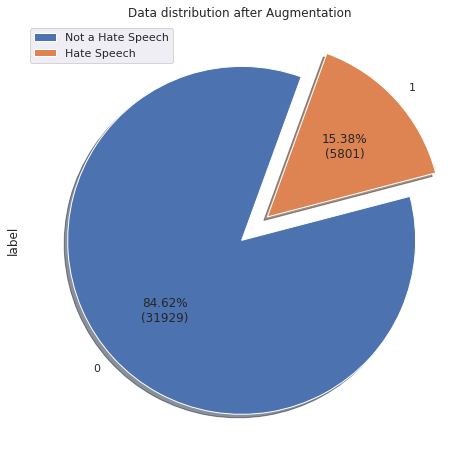

In [ ]:
x = aug_df.label.value_counts()
x
import seaborn as sns
x = aug_df.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution after Augmentation ', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

## Training Part PreProcess 

In [ ]:
# Expansion of short form words
aug_df['Text'] = aug_df['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))

In [ ]:
TextExtractionCleanUP.preprocessing_method(aug_df,'Text')

,Unnamed: 0,Text,label
0,0,right need education reform seeing failed read...,0
1,1,aww yeah good bing bong bing bong,0
2,2,falling laughing,0
3,3,gives white nationalist troll platform spread ...,1
4,4,gives white nationalist troll platform spread ...,1
...,...,...,...
37725,37725,according mathieson around incidence blue eyes...,0
37726,37726,hey guys letting know im gay fuck hoes nipples...,0
37727,37727,igers instadaily purchase proscar buy proscar ...,0
37728,37728,two days away vintage flea market fashion vint...,0


In [ ]:
TextExtractionCleanUP.spellCheck(aug_df,'Text')

In [ ]:
aug_df['Text'] = aug_df['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)

In [ ]:
aug_df['Text2'] = aug_df.Text.apply(lambda x: str(x)[1:-1]) 
aug_df

,Unnamed: 0,Text,label,Text2
0,0,"[right, need, education, reform, seeing, faile...",0,"'right', 'need', 'education', 'reform', 'seein..."
1,1,"[www, yeah, good, bing, bong, bing, bong]",0,"'www', 'yeah', 'good', 'bing', 'bong', 'bing',..."
2,2,"[falling, laughing]",0,"'falling', 'laughing'"
3,3,"[give, white, nationalist, troll, platform, sp...",1,"'give', 'white', 'nationalist', 'troll', 'plat..."
4,4,"[give, white, nationalist, troll, platform, sp...",1,"'give', 'white', 'nationalist', 'troll', 'plat..."
...,...,...,...,...
37725,37725,"[according, mathieson, around, incidence, blue...",0,"'according', 'mathieson', 'around', 'incidence..."
37726,37726,"[hey, guy, letting, know, im, gay, fuck, doe, ...",0,"'hey', 'guy', 'letting', 'know', 'im', 'gay', ..."
37727,37727,"[tiger, instadaily, purchase, proscar, buy, pr...",0,"'tiger', 'instadaily', 'purchase', 'proscar', ..."
37728,37728,"[two, day, away, vintage, flea, market, fashio...",0,"'two', 'day', 'away', 'vintage', 'flea', 'mark..."


In [ ]:
X_train = aug_df['Text2']
y_train = aug_df['label']

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (37730,)
y_train shape: (37730,)
X_test shape: (11315,)
y_test shape: (11315,)


## Testing Part PreProcess

In [ ]:
# Now pre processing testing data
testingData = pd.concat([X_test, y_test], axis=1, join='inner')
testingData

,Text,label
38777,â #united kingdom claimant count change belo...,0
17594,"@user oh, no! lois duncan died. i met her a f...",0
1239,Good thing there are the zionist police to kee...,0
26147,@user is all sweet and peachy with hillary and...,0
42270,@user ahhhh then let the madness unravel ð...,0
...,...,...
12000,#playinggames buffalo simulation: buffalo fo...,0
37208,know anyone who needs to shop here? i wonder i...,0
31554,@user @user #nationalcampingmonth great priz...,0
34800,@user @user @user i tried to text you about it...,0


In [ ]:
# Expansion of short form words
testingData['Text'] = testingData['Text'].apply(lambda x: TextExtractionCleanUP.preprocess_english(x))
TextExtractionCleanUP.preprocessing_method(testingData,'Text')
# SpellCheck
TextExtractionCleanUP.spellCheck(testingData,'Text')
# Lemmetize and tokenize
testingData['Text'] = testingData['Text'].apply(TextExtractionCleanUP.lemmatize_Tokenize_text)
testingData['Text2'] = testingData.Text.apply(lambda x: str(x)[1:-1]) 
testingData

,Text,label,Text2
38777,"[â, united, kingdom, claimant, count, change, ...",0,"'â', 'united', 'kingdom', 'claimant', 'count',..."
17594,"[oh, lois, duncan, died, met, time, fascinatin...",0,"'oh', 'lois', 'duncan', 'died', 'met', 'time',..."
1239,"[good, thing, zionist, police, keep, coming, t...",0,"'good', 'thing', 'zionist', 'police', 'keep', ..."
26147,"[sweet, peach, hillary, get, interview, like, ...",0,"'sweet', 'peach', 'hillary', 'get', 'interview..."
42270,"[ahhhh, let, madness, unravel, ðððððâïð¾]",0,"'ahhhh', 'let', 'madness', 'unravel', 'ðððððâïð¾'"
...,...,...,...
12000,"[playinggames, buffalo, simulation, buffalo, t...",0,"'playinggames', 'buffalo', 'simulation', 'buff..."
37208,"[know, anyone, need, shop, wonder, could, purc...",0,"'know', 'anyone', 'need', 'shop', 'wonder', 'c..."
31554,"[nationalcingmonth, great, prize, good, luck, ...",0,"'nationalcingmonth', 'great', 'prize', 'good',..."
34800,"[tried, text, reply]",0,"'tried', 'text', 'reply'"


In [ ]:
X_test = testingData['Text2']
y_test = testingData['label']

##MODELING

In [ ]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_train)
#vec = get_feature_names_out()
tfidf_val = vec.transform(X_test)

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, average_precision_score, confusion_matrix, roc_auc_score
from tqdm import tqdm
import re
import nltk
from nltk.stem.porter import PorterStemmer
from textblob import Word
import datetime
import pandas as pd
import requests
import sys
sys.path.append("../py")

import gensim
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_y_hat))

def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    # Find True Positive
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    # Find False Negative
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

Accuracy:  0.9298276623950508
F1 Score:  0.3271186440677966
ROC-AUC:  0.8830006298369228
Recall:  0.19855967078189302
Precision:  0.9278846153846154
PR-AUC:  0.5885549585519654
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10343
           1       0.93      0.20      0.33       972

    accuracy                           0.93     11315
   macro avg       0.93      0.60      0.65     11315
weighted avg       0.93      0.93      0.91     11315



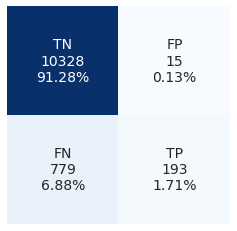

In [ ]:
nb = MultinomialNB().fit(tfidf_tr, y_train)
y_pr_nb_val = nb.predict(tfidf_val)
print(classification_report(y_test, y_pr_nb_val))

Accuracy:  0.9581970835174547
F1 Score:  0.709280885064536
ROC-AUC:  0.9527568097387191
Recall:  0.5936213991769548
Precision:  0.8809160305343512
PR-AUC:  0.8068998190176027
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     10343
           1       0.88      0.59      0.71       972

    accuracy                           0.96     11315
   macro avg       0.92      0.79      0.84     11315
weighted avg       0.96      0.96      0.95     11315



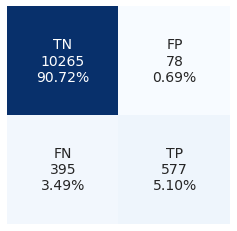

In [ ]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_train)
y_pr_rf_val = rf.predict(tfidf_val)
print(classification_report(y_test, y_pr_rf_val))

Accuracy:  0.9212549712770658
F1 Score:  0.46163141993957696
ROC-AUC:  0.8594910615278659
Recall:  0.39300411522633744
Precision:  0.5592972181551976
PR-AUC:  0.47841858400562187
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10343
           1       0.56      0.39      0.46       972

    accuracy                           0.92     11315
   macro avg       0.75      0.68      0.71     11315
weighted avg       0.91      0.92      0.91     11315



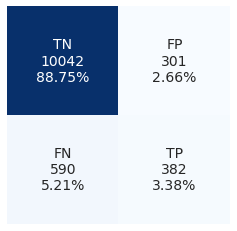

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200).fit(tfidf_tr, y_train)
y_pr_abc_val = abc.predict(tfidf_val)
print(classification_report(y_test, y_pr_abc_val))

Accuracy:  0.9228457799381352
F1 Score:  0.31313926042486234
ROC-AUC:  0.8126710615994835
Recall:  0.20473251028806586
Precision:  0.6655518394648829
PR-AUC:  0.43766869222057775
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10343
           1       0.67      0.20      0.31       972

    accuracy                           0.92     11315
   macro avg       0.80      0.60      0.64     11315
weighted avg       0.91      0.92      0.90     11315



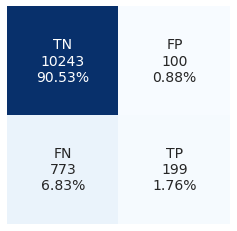

In [ ]:
gbc = GradientBoostingClassifier().fit(tfidf_tr, y_train)
y_pr_gbc_val = gbc.predict(tfidf_val)
print(classification_report(y_test, y_pr_gbc_val))

Accuracy:  0.9466195315952276
F1:  0.668859649122807
Recall:  0.6275720164609053
Precision:  0.715962441314554
ROC-AUC:  0.9248400242067456
PR-AUC:  0.7073646684728713
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     10343
           1       0.72      0.63      0.67       972

    accuracy                           0.95     11315
   macro avg       0.84      0.80      0.82     11315
weighted avg       0.94      0.95      0.95     11315



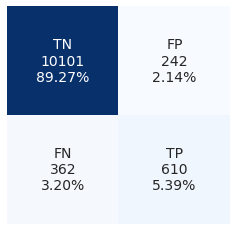

In [ ]:
from sklearn import svm
svc = svm.LinearSVC(random_state=42).fit(tfidf_tr, y_train)
y_pr_svc_val = svc.predict(tfidf_val)
print(classification_report(y_test, y_pr_svc_val))

In [ ]:
data = {'Accuracy': [accuracy(y_test, y_pr_nb_val), 
                     accuracy(y_test, y_pr_rf_val), 
                     accuracy(y_test, y_pr_svc_val),
                     accuracy(y_test, y_pr_abc_val),
                     accuracy(y_test, y_pr_gbc_val)],
        'F1 Score': [f1(y_test, y_pr_nb_val), 
                     f1(y_test, y_pr_rf_val), 
                     f1(y_test, y_pr_svc_val),
                     f1(y_test, y_pr_abc_val),
                     f1(y_test, y_pr_gbc_val)],
        'Recall': [recall(y_test, y_pr_nb_val), 
                   recall(y_test, y_pr_rf_val), 
                   recall(y_test, y_pr_svc_val),
                   recall(y_test, y_pr_abc_val),
                   recall(y_test, y_pr_gbc_val)],
        'Precision': [precision(y_test, y_pr_nb_val), 
                      precision(y_test, y_pr_rf_val), 
                      precision(y_test, y_pr_svc_val),
                      precision(y_test, y_pr_abc_val),
                      precision(y_test, y_pr_gbc_val)]}
output = pd.DataFrame(data=data, index = ['Multinomial Naive Bayes', 
                                           'Random Forest',
                                           'Support Vector Machine', 
                                           'AdaBoost Classifier', 
                                           'Gradient Boosting Classifier'])

In [ ]:
import pandas as pd
output = pd.read_csv("OutputWith8to15perBackTrans.csv")
output

,Model,Accuracy,F1 Score,Recall,Precision,ROC-AUC,PR-AUC
0,Multinomial Naive Bayes,0.929828,0.327119,0.198560,0.927885,0.883001,0.588555
1,Random Forest,0.948190,0.679281,0.593621,0.850916,0.952757,0.806900
2,Support Vector Machine,0.936620,0.628860,0.557572,0.715962,0.924840,0.707365
3,AdaBoost Classifier,0.921255,0.461631,0.393004,0.559297,0.859491,0.478419
4,Gradient Boosting Classifier,0.922846,0.313139,0.204733,0.665552,0.812671,0.437669


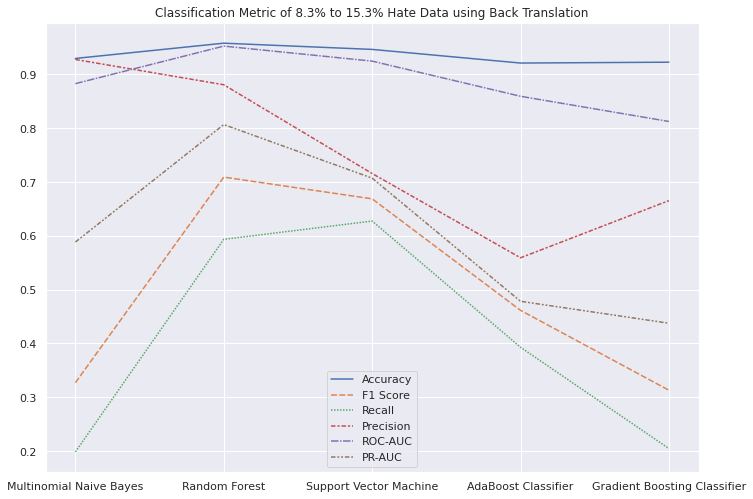

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Classification Metric of 8.3% to 15.3% Hate Data using Back Translation")
sns.lineplot(data=output)